In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
import itertools
warnings.filterwarnings("ignore")

In [3]:
test_pa=pd.read_csv('test_preattrition.csv')

In [4]:
slack=['EnvironmentSatisfaction','JobLevel','StockOptionLevel','PercentSalaryHike','WorkLifeBalance']

In [5]:
slack_willingness=[60, 40, 80, 60, 40]

In [6]:
import math
s=sum(slack_willingness)
for i in range(len(slack_willingness)):
  slack_willingness[i]=(slack_willingness[i]/s)*100

In [23]:
train=pd.read_csv("train.csv")

AttributeError: ignored

In [20]:
fulllis=[]
for a in range(len(slack)):
  global fulllis
  lis=[]
  if slack[a]=='PercentSalaryHike':
      for i in range(min(train[slack[a]]),max(train[slack[a]])+1,2):
        lis.append(i)
  else:
      for i in range(min(train[slack[a]]),max(train[slack[a]])+1):
        lis.append(i)
  fulllis.append(lis)

In [ ]:
num_comb=1
for i in fulllis:
  num_comb=num_comb*len(i)
num_comb

2560

In [21]:
fulllis

[[1, 2, 3, 4],
 [1, 2, 3, 4, 5],
 [0, 1, 2, 3],
 [11, 13, 15, 17, 19, 21, 23, 25],
 [1, 2, 3, 4]]

In [51]:
scale=[]
for i in range(5):
  scale.append(MinMaxScaler())
  scale[i].fit(np.array(train[slack[i]].values).reshape(-1,1))

'ctr=0\nscaled_li=[]\nfor itr in fulllis:\n  mx.fit(np.array(itr).reshape(-1,1))\n  scaled_li.append((mx.transform(np.array(itr).reshape(-1,1))).tolist())\n  ctr+=1\n#mx.fit(np.array(fulllis[0]).reshape(-1,1))\n#print(mx.transform(test_var))\nmx.fit(np.array(fulllis[4]).reshape(-1,1))\nfulllis[4]=((mx.transform(np.array(fulllis[4]).reshape(-1,1))).tolist())\nfulllis'

In [27]:
test_pa.head(6)

,Pre_Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dept-Human Resouces,Dept-Research & Development,Dept-Sales,EducationField-Human Resources,EducationField-Life Sciences,EducationField-Marketing,EducationField-Medical,EducationField-Other,EducationField-Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,36,1,10,4,2,1,3,3,4,1,9980,1,0,14,3,4,0,10,3,2,10,3,9,7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,33,2,25,3,4,1,2,2,2,1,4320,1,0,13,3,4,0,5,2,3,5,3,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,2,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,40,2,20,4,1,1,3,3,4,3,10322,4,0,20,4,4,1,14,6,3,11,10,11,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,1,29,3,24,2,4,1,2,1,4,1,2439,1,1,24,4,2,0,1,3,2,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,30,3,3,3,3,0,3,1,3,2,2083,1,0,20,4,3,1,1,2,3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [26]:
attrition_1=test_pa.loc[test_pa['Pre_Attrition']==1].copy()   #step-2 remove all attrition==0 copyeverything else to attrition_1 dataset
attrition_1.head(6)

,Pre_Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dept-Human Resouces,Dept-Research & Development,Dept-Sales,EducationField-Human Resources,EducationField-Life Sciences,EducationField-Marketing,EducationField-Medical,EducationField-Other,EducationField-Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,2,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,29,3,24,2,4,1,2,1,4,1,2439,1,1,24,4,2,0,1,3,2,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1,34,2,24,4,1,0,2,2,2,1,4599,0,1,23,4,3,0,16,2,4,15,9,10,10,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
13,1,28,2,1,2,1,0,1,1,2,1,2216,7,1,13,3,4,0,10,4,3,7,7,3,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
20,1,19,2,9,2,3,1,3,1,1,1,2552,1,0,25,4,3,0,1,4,3,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
24,1,26,2,23,3,3,0,2,2,4,3,4157,7,1,19,3,3,1,5,2,2,2,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
old_slack=attrition_1[slack].copy()
old_slack-old_slack.reset_index() # step-3 remove all features except slack copy everything else to old_slack dataset
print(old_slack.shape)
old_slack.head(6)

(43, 5)


,EnvironmentSatisfaction,JobLevel,StockOptionLevel,PercentSalaryHike,WorkLifeBalance
2,4,2,1,18,2
4,4,1,0,24,2
6,1,2,0,23,4
13,1,1,0,13,3
20,3,1,0,25,3
24,3,2,1,19,2


In [33]:
temp=attrition_1.copy()
all_expdata=pd.DataFrame(columns=attrition_1.columns)
import time
start = time.time()
for idx,itr_attrition1 in temp.iterrows():
  for x in list(itertools.product(*fulllis)):
    for i in range(len(x)):
      if(attrition_1[slack[i]][idx]<x[i]):
        itr_attrition1[slack[i]]=x[i]
    all_expdata=all_expdata.append(itr_attrition1)
end = time.time()
print('Created new Experimental dataframe elapsed time --> ',end-start)

Created new Experimental dataframe elapsed time -->  2412.6514291763306


In [34]:
all_expdata.shape   #make csv and change first column to OG index

(110080, 43)

In [35]:
all_expdata.head(25)

,Pre_Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dept-Human Resouces,Dept-Research & Development,Dept-Sales,EducationField-Human Resources,EducationField-Life Sciences,EducationField-Marketing,EducationField-Medical,EducationField-Other,EducationField-Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,2,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,2,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,3,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,4,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,4,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,4,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,3,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,4,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,4,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,4,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


##New start-using slack,slack_willingness,attrition_1 from above

In [39]:
Allposattrition_1_data=pd.read_csv('Allposattrition_1_data.csv')

In [40]:
Allposattrition_1_data.head()

,OG_idx,Pre_Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dept-Human Resouces,Dept-Research & Development,Dept-Sales,EducationField-Human Resources,EducationField-Life Sciences,EducationField-Marketing,EducationField-Medical,EducationField-Other,EducationField-Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,2,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,2,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,3,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,4,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1,35,3,18,4,4,0,3,2,3,3,4614,0,1,18,3,3,1,5,0,4,4,2,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [53]:
old_slack.head()

,EnvironmentSatisfaction,JobLevel,StockOptionLevel,PercentSalaryHike,WorkLifeBalance
2,4,2,1,18,2
4,4,1,0,24,2
6,1,2,0,23,4
13,1,1,0,13,3
20,3,1,0,25,3


In [54]:
new_slack=Allposattrition_1_data[slack].copy()
new_slack.head()

,EnvironmentSatisfaction,JobLevel,StockOptionLevel,PercentSalaryHike,WorkLifeBalance
0,4,2,1,18,2
1,4,2,1,18,2
2,4,2,1,18,3
3,4,2,1,18,4
4,4,2,1,18,4


In [55]:
for i in range(5):
  new_slack[slack[i]]=scale[i].transform(np.array(new_slack[slack[i]]).reshape(-1,1)).copy()
  old_slack[slack[i]]=scale[i].transform(np.array(old_slack[slack[i]]).reshape(-1,1)).copy()
new_slack.insert(0,Allposattrition_1_data.columns[0],np.array(Allposattrition_1_data.iloc[:,0]))

In [56]:
old_slack.head()

,EnvironmentSatisfaction,JobLevel,StockOptionLevel,PercentSalaryHike,WorkLifeBalance
2,1.000000,0.25,0.333333,0.500000,0.333333
4,1.000000,0.00,0.000000,0.928571,0.333333
6,0.000000,0.25,0.000000,0.857143,1.000000
13,0.000000,0.00,0.000000,0.142857,0.666667
20,0.666667,0.00,0.000000,1.000000,0.666667


In [57]:
new_slack.head()

,OG_idx,EnvironmentSatisfaction,JobLevel,StockOptionLevel,PercentSalaryHike,WorkLifeBalance
0,2,1.0,0.25,0.333333,0.5,0.333333
1,2,1.0,0.25,0.333333,0.5,0.333333
2,2,1.0,0.25,0.333333,0.5,0.666667
3,2,1.0,0.25,0.333333,0.5,1.000000
4,2,1.0,0.25,0.333333,0.5,1.000000


In [348]:
diff=pd.DataFrame(columns=old_slack.columns)
for i in range(old_slack.shape[0]):
  diff=diff.append(pd.DataFrame(np.array(new_slack.iloc[i*num_comb:(i+1)*num_comb,1:6])-np.array(old_slack.iloc[i,:]),columns=old_slack.columns))
diff.head()

,EnvironmentSatisfaction,JobLevel,StockOptionLevel,PercentSalaryHike,WorkLifeBalance
0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.333333
3,0.0,0.0,0.0,0.0,0.666667
4,0.0,0.0,0.0,0.0,0.666667


In [349]:
diff.insert(0,Allposattrition_1_data.columns[0],np.array(new_slack.iloc[:,0]))
diff.reset_index(inplace=True)
diff.drop('index',inplace=True,axis=1)
diff.head()

,OG_idx,EnvironmentSatisfaction,JobLevel,StockOptionLevel,PercentSalaryHike,WorkLifeBalance
0,2,0.0,0.0,0.0,0.0,0.000000
1,2,0.0,0.0,0.0,0.0,0.000000
2,2,0.0,0.0,0.0,0.0,0.333333
3,2,0.0,0.0,0.0,0.0,0.666667
4,2,0.0,0.0,0.0,0.0,0.666667


In [135]:
pred=pd.read_csv('prediction_paper.csv')    #predicting on Allposattrition_1_data
pred.head()
slect=Allposattrition_1_data.loc[pred['predict']==0].copy()   #selecting those that had predict =0 meaning the changes were successful in them

In [136]:
slect.index.values

array([     2,      3,      4, ..., 110077, 110078, 110079])

In [137]:
diff_0_predict=diff.iloc[slect.index.values,:].copy()    #diff_0_predict is all values of new - old where attrition is 0
print(diff.head())
diff_0_predict=diff_0_predict.reset_index()
print(diff_0_predict.head())

   OG_idx  EnvironmentSatisfaction  ...  PercentSalaryHike  WorkLifeBalance
0       2                      0.0  ...                0.0         0.000000
1       2                      0.0  ...                0.0         0.000000
2       2                      0.0  ...                0.0         0.333333
3       2                      0.0  ...                0.0         0.666667
4       2                      0.0  ...                0.0         0.666667

[5 rows x 6 columns]
   index  OG_idx  ...  PercentSalaryHike  WorkLifeBalance
0      2       2  ...                0.0         0.333333
1      3       2  ...                0.0         0.666667
2      4       2  ...                0.0         0.666667
3      5       2  ...                0.0         0.666667
4      6       2  ...                0.0         0.333333

[5 rows x 7 columns]


In [138]:
diff_0_predict.to_csv('predicted_subtract.csv')

In [193]:
vector_ofcost=diff_0_predict.iloc[:,2:7]@np.array(100-np.array(slack_willingness))    #multiplying by unwillingness factor

In [194]:
vector_ofcost   #the index of cost(in experimental_testdata) and cost

0         28.571429
1         57.142857
2         57.142857
3         57.142857
4         28.571429
            ...    
82692    273.299320
82693    284.523810
82694    284.523810
82695    255.952381
82696    284.523810
Length: 82697, dtype: float64

In [196]:
print(slack_willingness)
100-np.array(slack_willingness)

[21.428571428571427, 14.285714285714285, 28.57142857142857, 21.428571428571427, 14.285714285714285]


array([78.57142857, 85.71428571, 71.42857143, 78.57142857, 85.71428571])

In [197]:
groupby_cost=np.hstack((np.array(diff_0_predict.iloc[:,1]).reshape(-1,1),(vector_ofcost.values).reshape(-1,1)))    #merging groupby keys and cost

In [198]:
set(groupby_cost[:,0])

{2.0,
 6.0,
 13.0,
 20.0,
 25.0,
 28.0,
 45.0,
 46.0,
 48.0,
 51.0,
 54.0,
 78.0,
 97.0,
 101.0,
 107.0,
 132.0,
 136.0,
 160.0,
 163.0,
 183.0,
 186.0,
 188.0,
 191.0,
 198.0,
 202.0,
 221.0,
 222.0,
 227.0,
 236.0,
 247.0,
 252.0,
 258.0,
 259.0,
 267.0,
 268.0,
 277.0,
 280.0,
 291.0}

In [199]:
groupby_cost

array([[  2.        ,  28.57142857],
       [  2.        ,  57.14285714],
       [  2.        ,  57.14285714],
       ...,
       [291.        , 284.52380952],
       [291.        , 255.95238095],
       [291.        , 284.52380952]])

In [200]:
groupby_cost=np.hstack((np.array(diff_0_predict.iloc[:,0]).reshape(-1,1),(groupby_cost)))    #merging groupby keys and cost

In [201]:
groupby_cost

array([[2.00000000e+00, 2.00000000e+00, 2.85714286e+01],
       [3.00000000e+00, 2.00000000e+00, 5.71428571e+01],
       [4.00000000e+00, 2.00000000e+00, 5.71428571e+01],
       ...,
       [1.10077000e+05, 2.91000000e+02, 2.84523810e+02],
       [1.10078000e+05, 2.91000000e+02, 2.55952381e+02],
       [1.10079000e+05, 2.91000000e+02, 2.84523810e+02]])

In [202]:
og_cost=pd.DataFrame(groupby_cost,columns=['index','OG','cost'],index=vector_ofcost.index)    #converting groupby keys and cost to dataframe and again index is of experimental_testdata

In [203]:
og_cost.to_csv('og_cost.csv')

In [204]:
verify_mincost=pd.DataFrame(og_cost.groupby('OG').min())
verify_mincost.head(49)     #index wrong-giving first of new OG always

,index,cost
OG,,
2.0,2.0,28.571429
6.0,5152.0,35.034014
13.0,8320.0,111.224490
20.0,10272.0,52.380952
25.0,15363.0,28.571429
28.0,18048.0,146.258503
45.0,21120.0,105.612245
46.0,23043.0,28.571429
48.0,26880.0,121.428571


In [205]:
setofog=np.unique(og_cost.iloc[:,1])
idxofmincost=[]
valofmincost=[]
i=0
for itr_og in setofog:
  predidx=5000000
  predid=0
  for idx,itr in og_cost.iloc[i:og_cost.shape[0],:].iterrows():
    if(itr[1]==itr_og):
      if(predidx>itr[2]):
        predidx=itr[2]
        predid=itr[0]
      i=i+1
    else:
      break
    
  idxofmincost.append(predid)
  valofmincost.append(predidx)

In [206]:
idxofmincost    #Final index(w.r.t experimental_testdata) of all minimum cost 

[2.0,
 5152.0,
 8488.0,
 10272.0,
 15363.0,
 20040.0,
 21288.0,
 23043.0,
 27072.0,
 28378.0,
 30912.0,
 35368.0,
 35884.0,
 38428.0,
 40996.0,
 46208.0,
 48676.0,
 51270.0,
 55810.0,
 58634.0,
 58960.0,
 61443.0,
 66096.0,
 66726.0,
 69188.0,
 71683.0,
 74282.0,
 76802.0,
 81926.0,
 84520.0,
 87088.0,
 92163.0,
 95544.0,
 97283.0,
 102028.0,
 102402.0,
 105140.0,
 107570.0]

In [209]:
np.array(valofmincost)-(verify_mincost.iloc[:,1])    #using this idxofmincost.append(predidx) instead of this idxofmincost.append(predidx) to verify if values are minimum

OG
2.0      0.0
6.0      0.0
13.0     0.0
20.0     0.0
25.0     0.0
28.0     0.0
45.0     0.0
46.0     0.0
48.0     0.0
51.0     0.0
54.0     0.0
78.0     0.0
97.0     0.0
101.0    0.0
107.0    0.0
132.0    0.0
136.0    0.0
160.0    0.0
163.0    0.0
183.0    0.0
186.0    0.0
188.0    0.0
191.0    0.0
198.0    0.0
202.0    0.0
221.0    0.0
222.0    0.0
227.0    0.0
236.0    0.0
247.0    0.0
252.0    0.0
258.0    0.0
259.0    0.0
267.0    0.0
268.0    0.0
277.0    0.0
280.0    0.0
291.0    0.0
Name: cost, dtype: float64

In [210]:
Changes_mincost_data=diff.iloc[idxofmincost,:].copy()

In [211]:
Changes_mincost_data.insert(0,'Cost',np.array(valofmincost))

In [212]:
Changes_mincost_data.head(49)

,Cost,OG_idx,EnvironmentSatisfaction,JobLevel,StockOptionLevel,PercentSalaryHike,WorkLifeBalance
2,28.571429,2,0.000000,0.00,0.000000,0.000000,0.333333
5152,35.034014,6,0.000000,0.00,0.333333,0.142857,0.000000
8488,111.224490,13,0.333333,0.25,0.333333,0.142857,0.333333
10272,52.380952,20,0.000000,0.00,0.333333,0.000000,0.333333
15363,28.571429,25,0.000000,0.00,0.000000,0.000000,0.333333
20040,146.258503,28,0.333333,0.25,0.666667,0.285714,0.333333
21288,105.612245,45,0.333333,0.25,0.333333,0.071429,0.333333
23043,28.571429,46,0.000000,0.00,0.000000,0.000000,0.333333
27072,121.428571,48,0.666667,0.25,0.666667,0.000000,0.000000
28378,103.231293,51,0.000000,0.25,0.666667,0.071429,0.333333


In [213]:
Changes_mincost_data.to_csv('change_mincost.csv')

In [214]:
import matplotlib.pyplot as plt

In [310]:
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('classic')

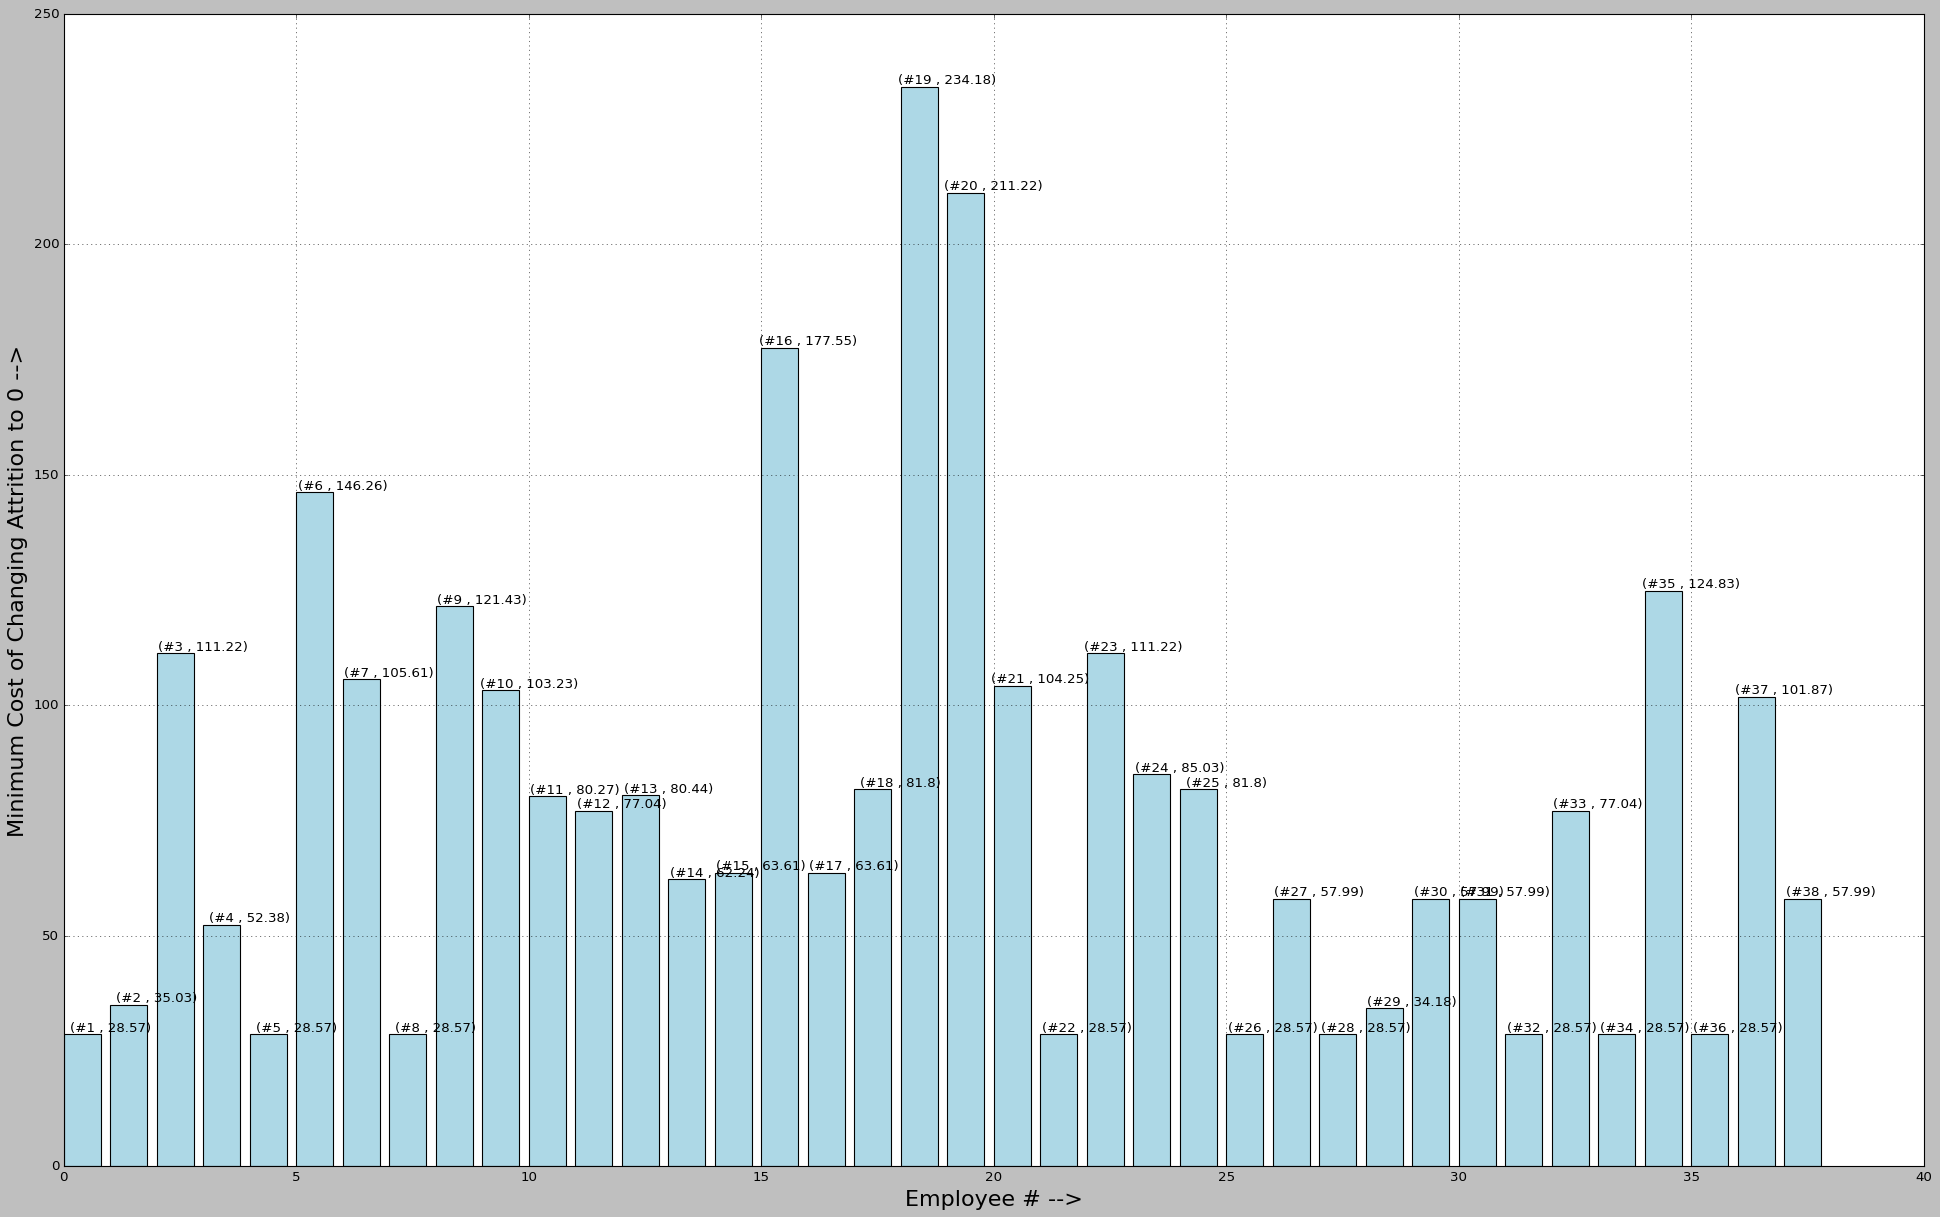

In [337]:
plt.figure(figsize=(30,18))
plt.grid()
plt.bar(range(38),valofmincost,width=0.8,color='lightblue',edgecolor='k',align='edge')
for a,b in zip(range(1,39),valofmincost): 
    plt.text(a, b, '('+'#'+str(a)+' , '+str(round(b,2))+')',fontsize=12,horizontalalignment='center',verticalalignment='bottom')
plt.xlabel('Employee # -->',fontsize=20)
plt.ylabel('Minimum Cost of Changing Attrition to 0 -->',fontsize=20)
plt.show()

[Text(0, 0.5, 'Change in Feature'), Text(0, 0.5, 'Change in Feature')]

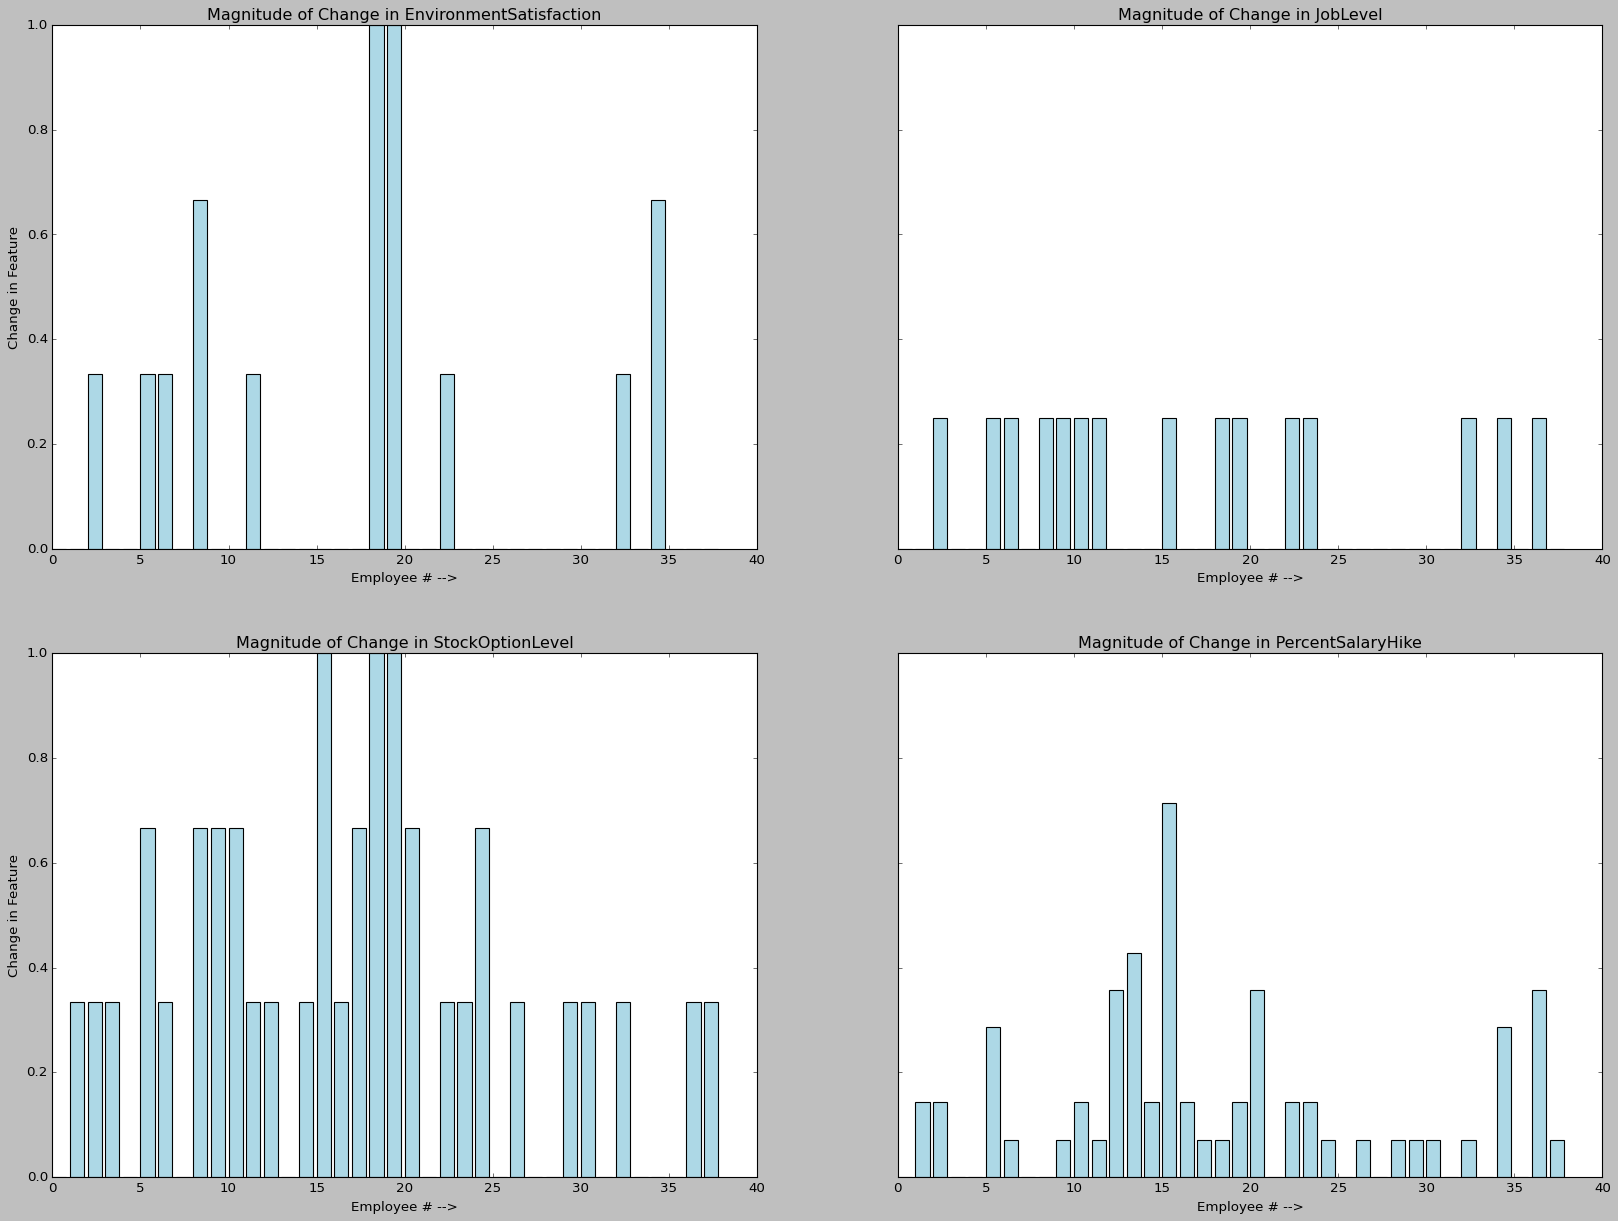

In [342]:
fig, axs = plt.subplots(2,2, figsize=(25, 18), sharex=False, sharey=True)
for i, ax in enumerate(axs.flat):
    ax.bar(range(38),Changes_mincost_data.iloc[:,i+2],color='lightblue',width=0.8,edgecolor='k',align='edge')
    ax.set_title(f'Magnitude of Change in {slack[i]}')

# set labels
plt.setp(axs[:, :], xlabel='Employee # -->')
plt.setp(axs[:, 0], ylabel='Change in Feature')

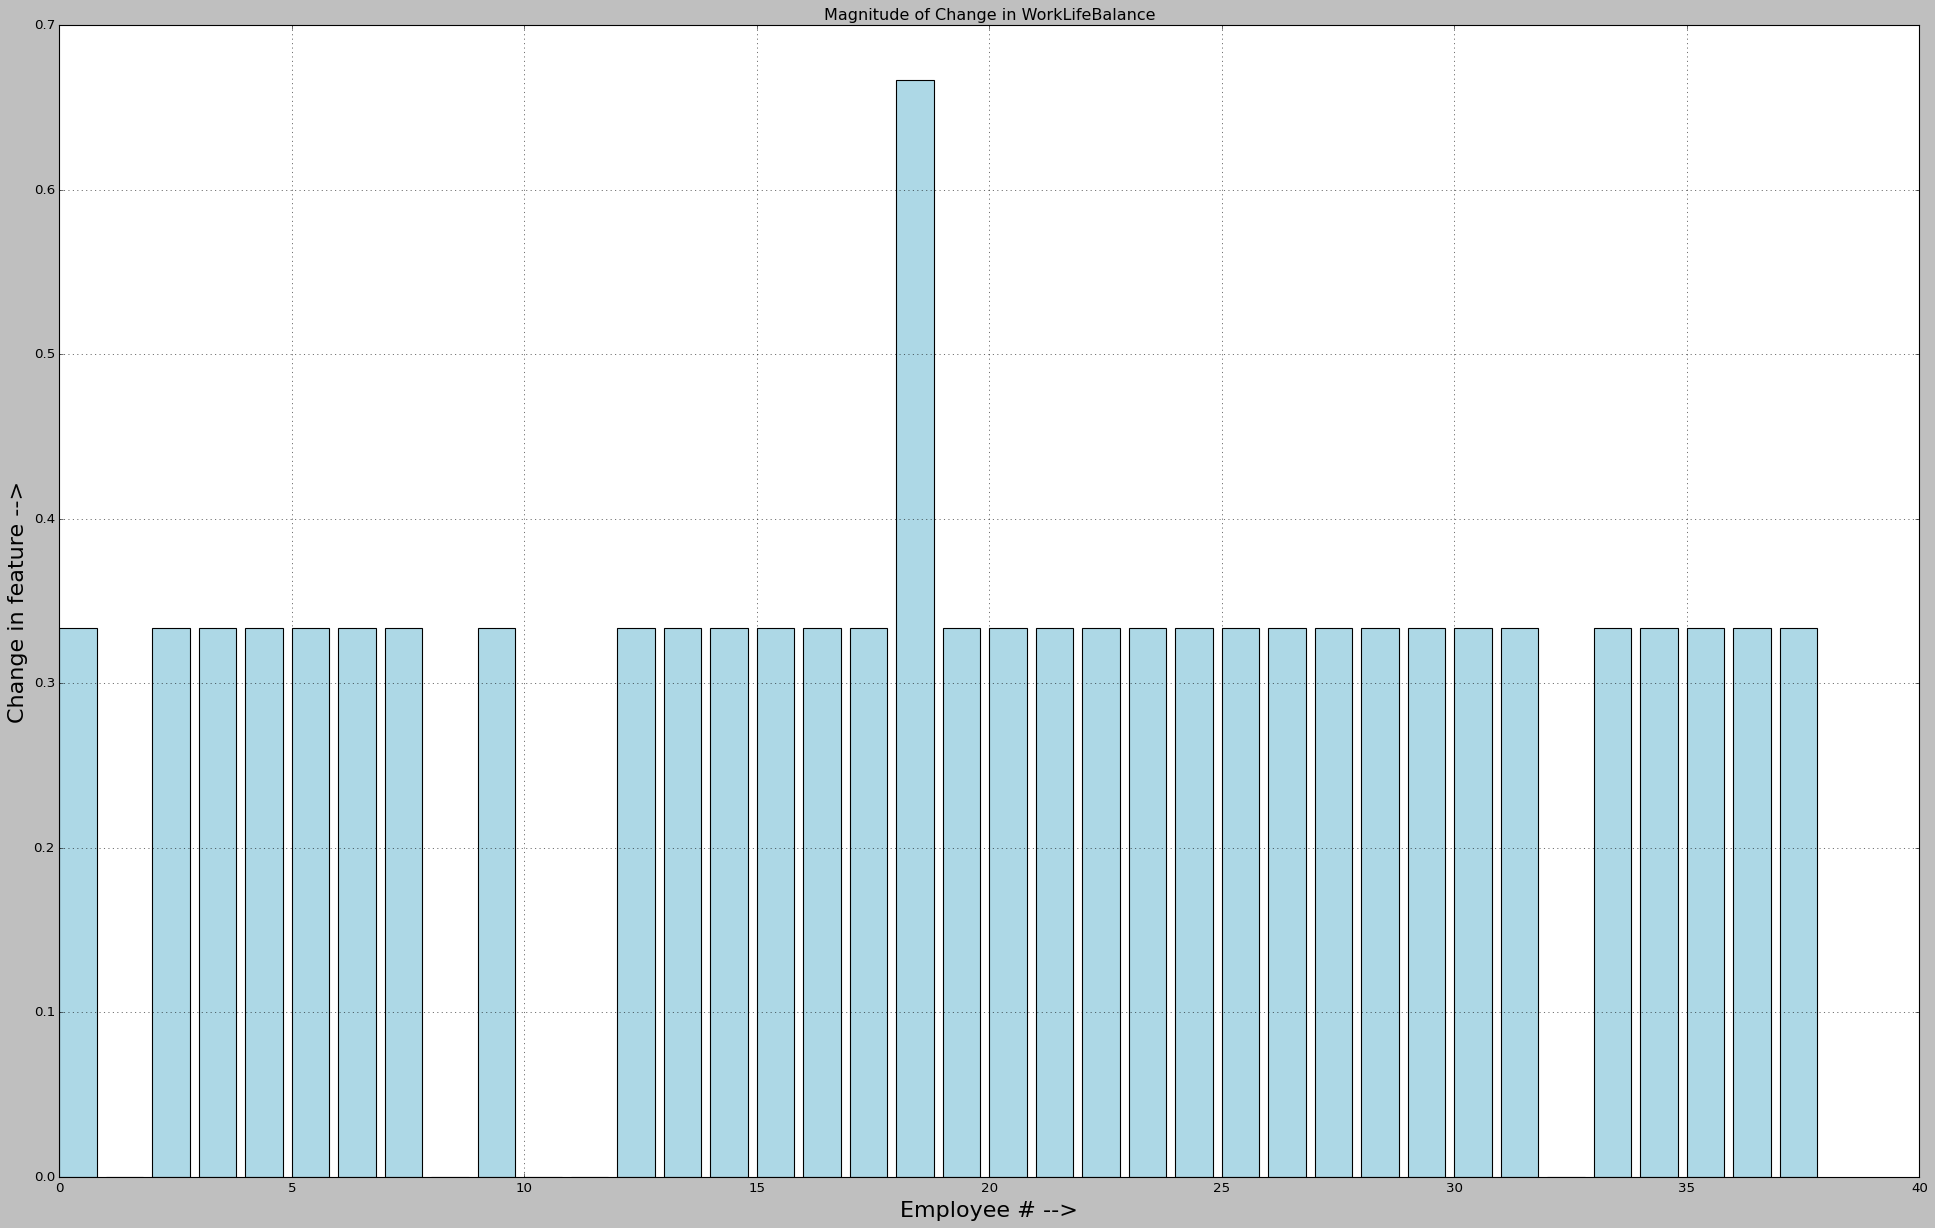

In [340]:
plt.figure(figsize=(30,18))
plt.grid()
plt.bar(range(38),Changes_mincost_data.iloc[:,6],width=0.8,color='lightblue',edgecolor='k',align='edge')
plt.xlabel('Employee # -->',fontsize=20)
plt.ylabel('Change in feature -->',fontsize=20)
plt.title(f'Magnitude of Change in {slack[4]}')
plt.show()